In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
import pandas as pd
import os

%matplotlib inline
np.random.seed(1)

/home/bekkasik/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [47]:
# Считаем маркировки данных
dataset = pd.read_csv('../input/diabetic-retinopathy-detection/trainLabels.csv')

In [48]:
dataset.shape

(35126, 2)

In [49]:
dataset.head()

image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1

In [50]:
# сделаем колонку ID пациента
dataset['PatientID'] = dataset['image'].map(lambda x: x.split('_')[0])
# создадим путь до изображений
dataset['path'] = dataset['image'].map(lambda x: os.path.join('../input/diabetic-retinopathy-detection/', '{}.jpeg'.format(x)))

In [51]:
dataset.head(3).T

0                                                  1                                                  2
image                                                10_left                                           10_right                                            13_left
level                                                      0                                                  0                                                  0
PatientID                                                 10                                                 10                                                 13
path       ../input/diabetic-retinopathy-detection/10_lef...  ../input/diabetic-retinopathy-detection/10_rig...  ../input/diabetic-retinopathy-detection/13_lef...

In [52]:
# Проверим наличие всех данных
dataset['exists'] = dataset['path'].map(os.path.exists)

In [53]:
dataset.head(3).T

0                                                  1                                                  2
image                                                10_left                                           10_right                                            13_left
level                                                      0                                                  0                                                  0
PatientID                                                 10                                                 10                                                 13
path       ../input/diabetic-retinopathy-detection/10_lef...  ../input/diabetic-retinopathy-detection/10_rig...  ../input/diabetic-retinopathy-detection/13_lef...
exists                                                  True                                               True                                               True

In [54]:
# проверим полноту данных и csv
print(dataset['exists'].sum(), 'images found of', dataset.shape[0], 'total')

35126 images found of 35126 total


In [19]:
dataset['eye'] = dataset['image'].map(lambda x: 1 if x.split('_')[-1] == 'left' else 0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd8643f828>,
      dtype=object)

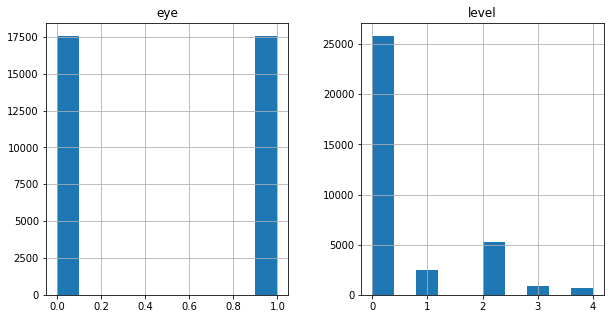

In [23]:
dataset[['level','eye']].hist(figsize = (10,5))

In [24]:
# Уберем дубликаты
dataset = dataset[['PatientID','level','eye','path']].drop_duplicates()

In [26]:
dataset.shape

(35126, 4)

In [27]:
# Посмотрим количество примеров каждого уровня
dataset[['level','PatientID']].groupby(['level']).agg(['count'])

PatientID
          count
level          
0         25810
1          2443
2          5292
3           873
4           708

In [34]:
img_rows, img_cols = 224,224

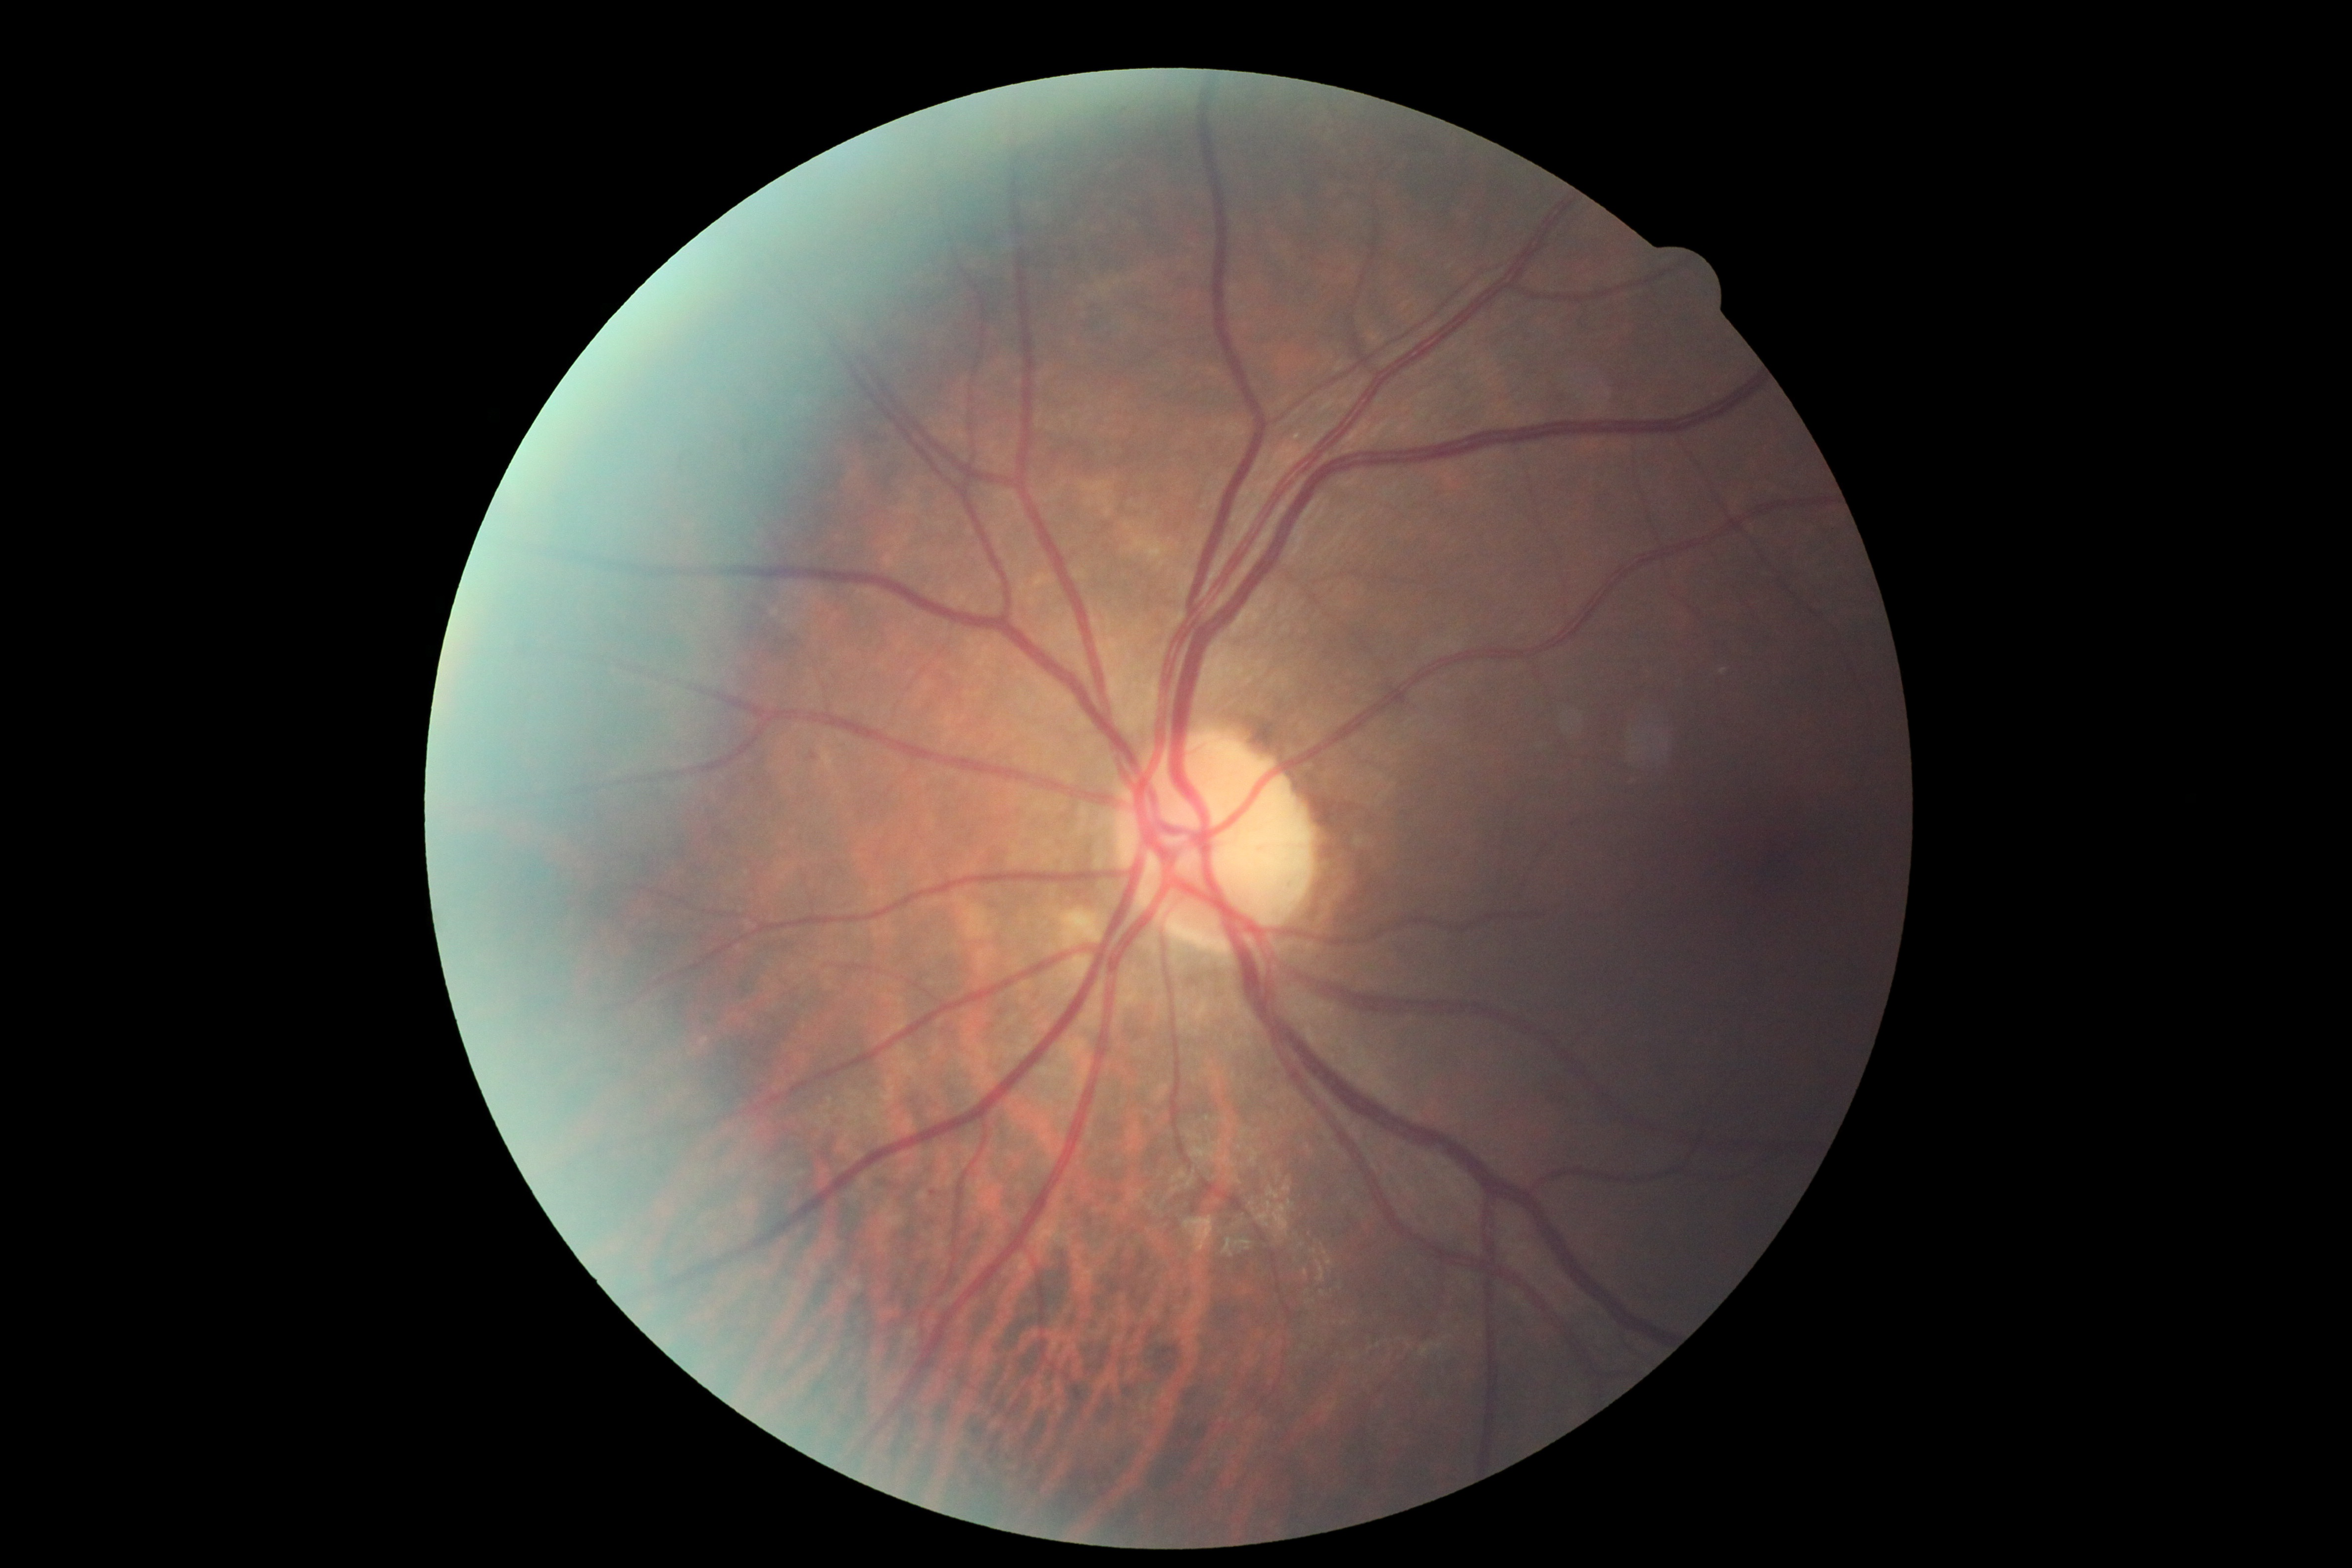

In [31]:
Image.open(dataset['path'][0])

In [32]:
img = Image.open(dataset['path'][0])

In [35]:
img = img.resize((img_rows,img_cols))

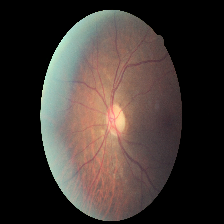

In [36]:
img

In [37]:
rgb = img.convert('RGB')

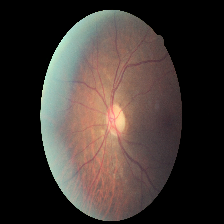

In [41]:
rgb

In [42]:
listing = os.listdir('../input/diabetic-retinopathy-detection/')